# HW 7 Оксана Рудковская, Классификация дохода

Дана статистика пользователей adult.csv.
Получите значения AUC для различных моделей и их параметров.
Используйте как минимум 3 различные модели классификации.
Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('adult.csv')
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})

In [6]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  8


In [7]:
data[numerical_feats].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
data[categorical_feats] = data[categorical_feats].replace("?",None)

In [9]:
for i in categorical_feats:
    print("\n",i)
    print(data[i].value_counts())


 workclass
Private             36023
Self-emp-not-inc     4084
Local-gov            3301
State-gov            2096
Self-emp-inc         1793
Federal-gov          1511
Without-pay            24
Never-worked           10
Name: workclass, dtype: int64

 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

 occupation
Prof-specialty       6557
Craft-repair         6510
Exec-managerial      6

In [10]:
df_num_corr = data[numerical_feats].corr()['income'][:-1]
df_num_corr[abs(df_num_corr) > 0.0].sort_values(ascending=False) 
# Смотрим на корреляцию числовых признаков относительно цены (выделили > 0.5)

educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
capital-loss       0.147554
fnlwgt            -0.006339
Name: income, dtype: float64

In [11]:
data = data.drop(['fnlwgt'],axis=1) # неинформативный столбец
data = data.drop(['education'],axis=1) # цифровой аналог этого столбца educational-num со шкалой полученного образования
data = data.drop(['marital-status'],axis=1) # похожий признак relationship, в нем меньше уникальных значений

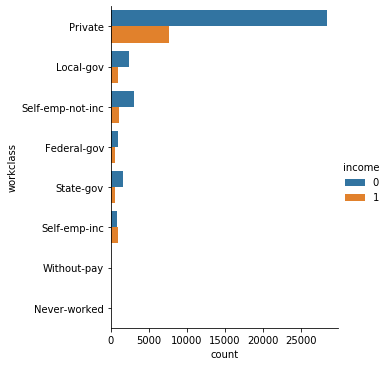

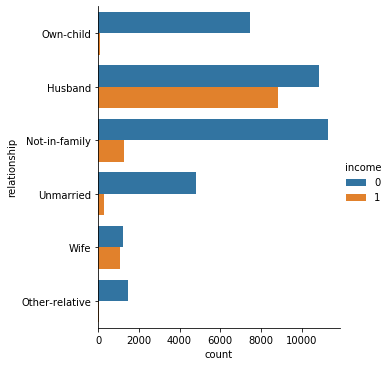

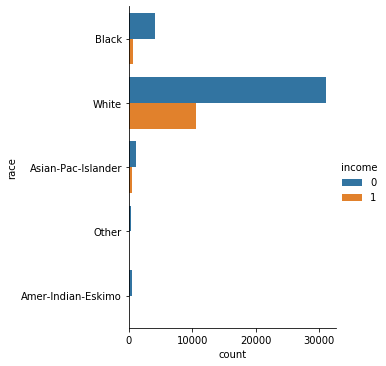

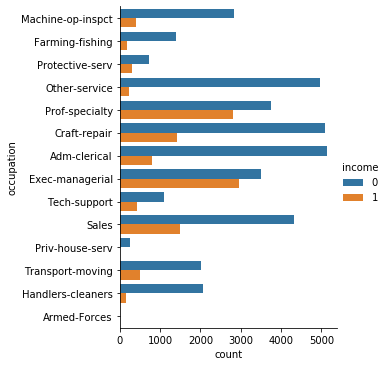

In [12]:
sns.catplot(y="workclass", hue="income", kind="count", data=data);
sns.catplot(y="relationship", hue="income", kind="count", data=data);
sns.catplot(y="race", hue="income", kind="count", data=data);
sns.catplot(y="occupation", hue="income", kind="count", data=data);

Знаения в признаке 'native-country' очень разнообразны, но подавляющее число принадлежит United-States, в том числе и с большим доходом, поэтому я сделаю два признака:
United-States и Other_country

In [13]:
y = data['income']
data = data.drop(['income'],axis=1)
data.loc[data['native-country'] != 'United-States','native-country'] = 'Other_country'

In [14]:
data['gender']=data['gender'].map({'Male': 1, 'Female': 0})
numerical_feats = data.dtypes[data.dtypes != "object"].index
categorical_feats = data.dtypes[data.dtypes == "object"].index


In [15]:
dummy_data = pd.get_dummies(data, columns=list(categorical_feats))

In [16]:
dummy_data.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Other_country,native-country_United-States
0,25,7,1,0,0,40,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,38,9,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,28,12,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,1,7688,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,18,10,0,0,0,30,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=.2)
for trn_idx,tst_idx in sss.split(dummy_data,y):
    X_train,y_train = dummy_data.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = dummy_data.iloc[tst_idx],y.iloc[tst_idx]
    
assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(dummy_data) == len(y)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Дерево решений

In [19]:
params_tree = [ {'max_depth': list( range(1, 20) )} ]
clf_tree = GridSearchCV( DecisionTreeClassifier(), param_grid = params_tree, scoring = 'roc_auc', return_train_score = False, cv = 5 )

In [20]:
clf_tree.fit( X_train,y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [21]:
print(clf_tree.best_params_,
clf_tree.best_score_)

{'max_depth': 9} 0.9030043782134435


In [22]:
for i in range(len(clf_tree.cv_results_['mean_test_score'])):
    print(clf_tree.cv_results_['params'][i],clf_tree.cv_results_['mean_test_score'][i])

{'max_depth': 1} 0.733929606291822
{'max_depth': 2} 0.8034747210934906
{'max_depth': 3} 0.8478490167598611
{'max_depth': 4} 0.8659054608089551
{'max_depth': 5} 0.8768777717597196
{'max_depth': 6} 0.890430299898046
{'max_depth': 7} 0.8990241739669305
{'max_depth': 8} 0.9023694498148039
{'max_depth': 9} 0.9030043782134435
{'max_depth': 10} 0.8991264867011315
{'max_depth': 11} 0.896087543633957
{'max_depth': 12} 0.8897596289320475
{'max_depth': 13} 0.883454403770617
{'max_depth': 14} 0.873616409156338
{'max_depth': 15} 0.8633776669529679
{'max_depth': 16} 0.8527400621320856
{'max_depth': 17} 0.8453409400774067
{'max_depth': 18} 0.8375509106015044
{'max_depth': 19} 0.8281728650996254


In [23]:
tree = DecisionTreeClassifier(max_depth= 9)

In [24]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
pr_tree = tree.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, pr_tree[:, 1] )
auc_tree = auc( fpr, tpr )

In [26]:
auc_tree = auc( fpr, tpr )
roc_auc_score(y_test, pr_tree[:, 1])

0.8994037416832521

### Случайный лес

In [27]:
params_rf = {'n_estimators':[10,200,1000],
          'max_depth':[5,15,30],
          'min_samples_leaf':[1,5,10],
          'random_state':[42],
          'n_jobs':[-1]}

In [28]:
clf_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5, scoring = 'roc_auc')

In [29]:
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [30]:
print(clf_rf.best_params_,
clf_rf.best_score_)

{'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 42} 0.9190630318397339


In [48]:
rf = RandomForestClassifier(max_depth = 30, min_samples_leaf = 5, n_estimators = 1000, random_state = 42, n_jobs = -1)

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
pr_rf =rf.predict_proba(X_test)
roc_auc_score(y_test, pr_rf[:, 1])

0.9161040627091166

In [34]:
for i in range(len(clf_rf.cv_results_['mean_test_score'])):
    print(clf_rf.cv_results_['params'][i],clf_rf.cv_results_['mean_test_score'][i])

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 42} 0.8954295755098048
{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42} 0.9005600362595491
{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 42} 0.9012381637660134
{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 42} 0.8975783325327779
{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42} 0.9007632627899953
{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 42} 0.9011619896611242
{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 42} 0.8961956106724536
{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42} 0.9005372669776017
{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_st

In [35]:
pr_rf = rf.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, pr_rf[:, 1] )
auc_rf = auc( fpr, tpr )

### Логистическая регрессия

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_train.loc[:,numerical_feats] = sc.fit_transform(X_train[numerical_feats])
X_test.loc[:,numerical_feats] = sc.transform(X_test[numerical_feats])

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
params_log = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                   'penalty' : ['l1', 'l2']}

In [39]:
clf_log = GridSearchCV(LogisticRegression(solver='liblinear'), params_log, cv=5, scoring='roc_auc')

In [40]:
clf_log.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [41]:
print(clf_log.best_params_,
clf_log.best_score_)

{'C': 0.1, 'penalty': 'l2'} 0.904643518373614


In [42]:
for i in range(len(clf_log.cv_results_['mean_test_score'])):
    print(clf_log.cv_results_['params'][i],clf_log.cv_results_['mean_test_score'][i])

{'C': 0.01, 'penalty': 'l1'} 0.9006274153627076
{'C': 0.01, 'penalty': 'l2'} 0.9026725756781782
{'C': 0.1, 'penalty': 'l1'} 0.9045275426663396
{'C': 0.1, 'penalty': 'l2'} 0.904643518373614
{'C': 0.5, 'penalty': 'l1'} 0.9045903377880306
{'C': 0.5, 'penalty': 'l2'} 0.9045967636049193
{'C': 1, 'penalty': 'l1'} 0.9045698323717108
{'C': 1, 'penalty': 'l2'} 0.9045731248335501
{'C': 5, 'penalty': 'l1'} 0.90453288408382
{'C': 5, 'penalty': 'l2'} 0.9045388196074444
{'C': 10, 'penalty': 'l1'} 0.9045277941467871
{'C': 10, 'penalty': 'l2'} 0.9045295911506216
{'C': 50, 'penalty': 'l1'} 0.904520183584396
{'C': 50, 'penalty': 'l2'} 0.9045197504665164
{'C': 100, 'penalty': 'l1'} 0.9045183481394886
{'C': 100, 'penalty': 'l2'} 0.9045184012927742


In [51]:
log = LogisticRegression(penalty = 'l2', C = 0.1)

In [52]:
log.fit(X_train,y_train)

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pr_log =log.predict_proba(X_test)
roc_auc_score(y_test, pr_log[:, 1])

0.9007934301533619

In [54]:
pr_log = log.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, pr_log[:, 1] )
auc_log = auc( fpr, tpr )

# Итого
Лучше с поставленной задачей справилась модель Случайного леса, дерево решений и логистическая регрессия чуть уступают:

In [55]:
print (f"AUC  : TREE={auc_tree:.3f}, LR={auc_log:.3f}, RF={auc_rf:.3f}")

AUC  : TREE=0.899, LR=0.901, RF=0.915
